### Table of contents
1. [Import libraries](#Import-libraries)
2. [Total rescue actions map (2018-2022)](#2.-Total-rescue-actions-map)
    1. [Data exploration](#2.A-Data-exploration)
    2. [Catalonia map](#2.B-Catalonia-map)
    3. [A first geographical plot ](#2.C-A-first-geographical-plot)
3. [Civil protection plans (2018-2022)](#3.-Civil-protection-plans)
    1. [Data exploration](#3.A.-Data-exploration)
        1. [Extramunicipal PP](#Supramunicipal-protection-plans)
        2. [Municipal PP](#Municipal-protection-plans)
    2. [Homologation, update and revision of PP by county](#3.B-Homologation,-update-and-revision-of-PP-by-county)
    3. [A second geographical plot](#3.C-A-second-geographical-plot)
4. [Map panel](#4.-Map-panel)
5. [Rescue/ CPP study of Osona](#5.-Rescue/-CPP-study-of-Osona)
    1. [Rescue actions study of Osona](#5.A-Rescue-actions-study-of-Osona)
    2. [CPP action in Osona](#5.B-CPP-action-in-Osona)
    3. [Osona rescue/CPP action panel](#5.C-Osona-rescue/CPP-action-panel)
6. [Rescue/ CPP study of Baix Llobregat](#6.-Rescue/-CPP-study-of-Baix-Llobregat)
    1. [Rescue actions study of Baix Llobregat](#6.A-Rescue-actions-study-of-Baix-Llobregat)
    2. [CPP action in Baix Llobregat](#6.B-CPP-action-in-Baix-Llobregat)
    3. [Baix Llobregat rescue/CPP action panel](#6.C-Baix-Llobregat-rescue/CPP-action-panel)
7. [Rescue/ CPP study of Val d'Aran](#7.-Rescue/-CPP-study-of-Val-d'Aran)
    1. [Rescue actions study of Val d'Aran](#7.A-Rescue-actions-study-of-Val-d'Aran)
    2. [CPP action in Val d'Aran](#7.B-CPP-action-in-Val-d'Aran)

### Import libraries

In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import seaborn as sns
%matplotlib inline

Set data directory

In [2]:
data_dir = '../dades/'

### 2. Total rescue actions map
The first information we are interested in is finding a geographical plot containing all the rescue actions carried out by the Fire Department between 2018 and 2022, in order to indentify which how rescue actions (of any kind) are distributed geographically.

In [3]:
#load data
rescue_actions = pd.read_csv(data_dir+'Actuacions_en_salvaments_al_medi_natural_dels_Bombers_de_la_Generalitat_20231109.csv')

#### 2.A Data exploration
Exploration of data, in order to find if any formatting is needed in order te treat the data.

In [4]:
rescue_actions.head()

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
0,232539916,Metropolitana Nord,SV,salvaments,MU,Salvament i/o rescat de muntanya,8261,Santa Susanna,Santa Susanna,21,...,2023,10,08/10/2023,474668.0,4610652.0,25,N,2.695798,41.647208,POINT (2.695797715126 41.647207730681)
1,230315085,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25043,"Vall de Boí, La","Vall de Boí, La",5,...,2023,10,08/10/2023,324638.0,4719040.0,3,N,0.862264,42.603854,POINT (0.862264040642 42.603853695832)
2,232315301,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,8175,Puig-reig,Cal Riera,14,...,2023,10,08/10/2023,407110.0,4642434.0,23,N,1.879642,41.928405,POINT (1.879641578211 41.92840451498)
3,230229809,Girona,SV,salvaments,MU,Salvament i/o rescat de muntanya,17095,Lloret de Mar,Lloret de Mar,34,...,2023,10,08/10/2023,487480.0,4620337.0,2,N,2.849448,41.734746,POINT (2.849448083699 41.734745914847)
4,230229850,Girona,SV,salvaments,RA,Acompanyament de persones perdudes,17185,Sant Joan les Fonts,Sant Joan les Fonts,19,...,2023,10,08/10/2023,463030.0,4673271.0,2,N,2.552117,42.210731,POINT (2.55211709702 42.210731354776)


What columns does the dataframe have?

In [5]:
rescue_actions.columns

Index(['ACT_NUM_ACTUACIO', 'NOM REGIO', 'TAL_COD_ALARMA1', 'TGA_NOM_GRUPO',
       'TAL_COD_ALARMA2', 'TAL_NOM_ALARMA', 'CODI_INE', 'MUNICIPI',
       'NOM_POBLACIO', 'CODI_COMARCA', 'NOM_COMARCA', 'ANY', 'MES',
       'ACT_DAT_ACTUACIO', 'ACT_X_UTM', 'ACT_Y_UTM', 'CODI_REGIO', 'VALIDAT',
       'LONGITUD', 'LATITUD', 'GEOREFERÈNCIA'],
      dtype='object')

We will only study the time window between 2018-2022

In [6]:
rescue_actions[(rescue_actions["ANY"] >= 2018) & (rescue_actions["ANY"]<= 2022)]

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
1794,220317846,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25089,Farrera,Montesclado,26,...,2022,12,31/12/2022,359029.0,4703443.0,3,S,1.285146,42.470508,POINT (1.285146163115 42.47050799814)
1795,220424995,Tarragona,SV,salvaments,MU,Salvament i/o rescat de muntanya,43049,Cornudella de Montsant,Siurana,29,...,2022,12,31/12/2022,326877.0,4569430.0,4,S,0.933488,41.257753,POINT (0.933487648042 41.257752634189)
1796,222433564,Metropolitana Sud,SV,salvaments,MU,Salvament i/o rescat de muntanya,8270,Sitges,Sitges,17,...,2022,12,31/12/2022,396692.0,4564042.0,24,S,1.767511,41.221172,POINT (1.767511104528 41.221172153671)
1797,222703229,U.F. Val d'Aran,SV,salvaments,MU,Salvament i/o rescat de muntanya,25025,Naut Aran,Naut Aran,39,...,2022,12,31/12/2022,335546.0,4726173.0,27,S,0.993092,42.670455,POINT (0.993092440136 42.670455109079)
1798,222318655,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,17006,Alp,Alp,15,...,2022,12,31/12/2022,409042.0,4687406.0,23,S,1.895928,42.333593,POINT (1.895928288604 42.333593201755)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,182600035,Terres de l'Ebre,SV,salvaments,MU,Rescat de muntanya,43136,Sant Carles de la Ràpita,Sant Carles de la Ràpita,22,...,2018,1,02/01/2018,292357.0,4500888.0,26,SI,0.544737,40.632747,NaN
10233,182500044,Metropolitana Nord,SV,salvaments,MR,Recerca i/o rescat en medi marítim,8121,Mataró,Mataró,21,...,2018,1,01/01/2018,454218.0,4597542.0,25,SI,2.451231,41.528215,NaN
10234,180200036,Girona,SV,salvaments,MU,Rescat de muntanya,17032,Cadaqués,Cadaqués,2,...,2018,1,01/01/2018,524808.0,4684559.0,2,SI,3.301029,42.312873,NaN
10235,182500054,Metropolitana Nord,SV,salvaments,RC,Recerca persones perdudes,8120,Matadepera,Matadepera,40,...,2018,1,01/01/2018,418314.0,4610776.0,25,SI,2.019110,41.644542,NaN


Make a copy of filtered by year results

In [7]:
filt_rescues = rescue_actions[(rescue_actions["ANY"] >= 2018) & (rescue_actions["ANY"]<= 2022)].copy(deep = True)

Is there a standard numenclature for the type of rescue type?

In [8]:
filt_rescues["TAL_NOM_ALARMA"].unique()

array(['Salvament i/o rescat de muntanya',
       'Salvament i/o recerca i/o rescat en medi fluvial (rius,barrancs, llacs)',
       'Recerca persones perdudes o desaparegudes',
       'Salvament i/o recerca i/o rescat en medi marítim',
       'Salvament i/o rescat en coves i pous', 'Rescat de muntanya',
       'Recerca persones perdudes', 'Recerca i/o rescat en medi marítim',
       'Recerca i/o rescat en medi fluvial (rius, barrancs, llacs)',
       'Rescat en coves i pous'], dtype=object)

What data type is used for the dates?

In [9]:
type(filt_rescues.iloc[0]["ACT_DAT_ACTUACIO"])

str

If we need to deal with those dates, we will need to transform those into time-stamp format.

Are county names unique (standarized names)?

In [10]:
filt_rescues["NOM_COMARCA"].unique()

array(['Pallars Sobirà', 'Priorat', 'Garraf', "Val d'Aran", 'Cerdanya',
       'Alt Penedès', 'Bages', 'Baix Camp', 'Baix Llobregat', 'Gironès',
       'Garrotxa', 'Segrià', 'Ripollès', 'Alt Camp', 'Alt Urgell',
       'Maresme', 'Vallès Oriental', 'Pallars Jussà', 'Baix Ebre',
       'Osona', 'Vallès Occidental', 'Conca de Barberà', 'Alt Empordà',
       'Barcelonès', 'Solsonès', "Pla de l'Estany", 'Baix Empordà',
       "Ribera d'Ebre", 'Tarragonès', 'Alta Ribagorça', 'Terra Alta',
       'Berguedà', 'Anoia', 'Selva', 'Moianès', 'Noguera', 'Montsià',
       'Baix Penedès', 'Fora de Catalunya', 'Urgell', "Pla d'Urgell",
       'Garrigues', 'Segarra'], dtype=object)

How many rescue actions by county in 2018-2022 period? Drop other columns we do not need.

In [11]:
rescue_tot_comarca = filt_rescues[["CODI_COMARCA", "NOM_COMARCA","ACT_NUM_ACTUACIO"]].groupby(["CODI_COMARCA", "NOM_COMARCA"]).count().copy(deep = True).reset_index()
rescue_tot_comarca.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
0,0,Fora de Catalunya,8
1,1,Alt Camp,80
2,2,Alt Empordà,398
3,3,Alt Penedès,120
4,4,Alt Urgell,192


In [12]:
#We are only interested in rescue actions in Catalonia, se we need to pop 'Fora de Catalunya'
rescue_tot_comarca.drop(0, inplace =  True)

In [13]:
rescue_tot_comarca.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
1,1,Alt Camp,80
2,2,Alt Empordà,398
3,3,Alt Penedès,120
4,4,Alt Urgell,192
5,5,Alta Ribagorça,196


What are the counties with most rescue actions?

In [14]:
rescue_tot_comarca.sort_values(by='ACT_NUM_ACTUACIO', ascending = False).head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
11,11,Baix Llobregat,527
40,40,Vallès Occidental,517
39,39,Val d'Aran,500
31,31,Ripollès,479
14,14,Berguedà,417


#### 2.B Catalonia map
Read a Catalonia map dated in 2022 (we need to exclude the recently added county Lluçanès)

In [15]:
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'NOM_COMARCA'}, inplace = True)
cat.head()

,CODICOMAR,NOM_COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


Merging of DataFrames.

In [16]:
merged_rescue_tot = rescue_tot_comarca.merge(cat, how='left', on='NOM_COMARCA')
# merged_rescue_tot_gpd = gpd.GeoDataFrame(merged_rescue_tot, geometry="geometry", crs="EPSG:4326")
merged_rescue_tot_gpd = gpd.GeoDataFrame(merged_rescue_tot, geometry="geometry")
merged_rescue_tot.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,1,Alt Camp,80,01,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,2,Alt Empordà,398,02,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,3,Alt Penedès,120,03,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,4,Alt Urgell,192,04,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,5,Alta Ribagorça,196,05,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


#### 2.C A first geographical plot 
Total number of rescue actions between 2018 and 2022.

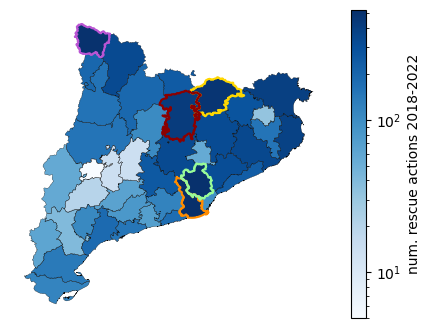

In [17]:
#highlight the counties with most rescue actions
colors = {"Baix Llobregat":'darkorange',
          "Vallès Occidental":'palegreen',
          "Val d'Aran":'mediumorchid',
          "Ripollès":'gold',
          "Berguedà":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
norm = LogNorm()

plot = merged_rescue_tot_gpd.plot(column = 'ACT_NUM_ACTUACIO',
                                  ax=ax,
                                  legend=False,
                                  cmap='Blues',
                                  norm = norm,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.2})
merged_rescue_tot_gpd.boundary.plot(ax = ax, linewidth = 0.2, color = 'black')
merged_rescue_tot_gpd = merged_rescue_tot_gpd.set_index("NOM_COMARCA")
merged_rescue_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()), linewidth = 1.5)
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cbar = fig.colorbar(plot.get_children()[0], ax = ax, label = r'num. rescue actions 2018-2022')
cb_ax = fig.axes[1] 
# cb_ax.tick_params(labelsize=10)
plt.savefig('figures/total_num_2018_2022.pdf')
plt.show()

### 3. Civil protection plans

Import data

In [18]:
#import
prot_plans = pd.read_csv(data_dir+'Registre_general_de_plans_de_protecci__civil_de_Catalunya_20231109.csv')

#### 3.A. Data exploration

In [19]:
prot_plans.head()

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
0,-,2208,PA PROCICAT - Emergències Episodis Contaminaci...,Aprovat pendent revisió,NaN,Actualització,13/02/2014,NaN,NaN,NaN,NaN,NaN,NaN
1,-,1296,PA del PROCICAT per Subsidència al barri de l'...,Revisió,NaN,Actualització,26/04/2012,NaN,NaN,NaN,NaN,NaN,NaN
2,E,2654,PAM INFOCAT La Selva del Camp,Homologat pendent de revisió,22/10/2009,Homologació,22/10/2009,43145.0,Selva del Camp,Baix Camp,Tarragona,Tarragona,Tarragona
3,E,2941,PAM SISMICAT Queralbs,Homologat pendent de revisió,08/09/2010,Homologació,08/09/2010,17043.0,Queralbs,Ripollès,Girona,Girona,Girona
4,E,2423,PAM INFOCAT Arsèguel,Homologat pendent de revisió,09/07/2009,Homologació,09/07/2009,25032.0,Arsèguel,Alt Urgell,Alt Pirineu i Aran,Alt Pirineu i Aran,Lleida


We only need data for updates/homologation/revision over the period 2018-2022. What is the time format?

In [20]:
prot_plans["Data de l'últim esdeveniment"].loc[0]

'13/02/2014'

És type string, canviem a datetime

In [21]:
prot_plans["Data d'homologació"] = pd.to_datetime(prot_plans["Data d'homologació"], format='%d/%m/%Y')
prot_plans["Data de l'últim esdeveniment"] = pd.to_datetime(prot_plans["Data de l'últim esdeveniment"], format='%d/%m/%Y')

In [22]:
prot_plans["Data de l'últim esdeveniment"].loc[0]

Timestamp('2014-02-13 00:00:00')

We can use this code to find the year of each entry

In [23]:
prot_plans["Data de l'últim esdeveniment"].loc[0].year

2014

Filter between 2018-2022, sort by ascending date and make a copy.

In [24]:
filt_prot_plans = prot_plans[(prot_plans["Data de l'últim esdeveniment"].dt.year >= 2018) & (prot_plans["Data de l'últim esdeveniment"].dt.year <= 2022)].sort_values(by = "Data de l'últim esdeveniment").copy(deep = True)

In [25]:
filt_prot_plans.head()

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
2190,E,5682,PAM TRANSCAT Amposta,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43014.0,Amposta,Montsià,Terres de l'Ebre,Terres de l'Ebre,Tarragona
2748,E,5709,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43065.0,Garcia,Ribera d'Ebre,Terres de l'Ebre,Terres de l'Ebre,Tarragona
4551,E,5603,PAM INUNCAT Vilagrassa,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25244.0,Vilagrassa,Urgell,Lleida,Lleida,Lleida
2260,E,5662,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43171.0,Vila-seca,Tarragonès,Tarragona,Tarragona,Tarragona
2259,T,5542,PBEM Ivars de Noguera,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25112.0,Ivars de Noguera,Noguera,Lleida,Lleida,Lleida


##### Supramunicipal protection plans

In [26]:
filt_prot_plans[filt_prot_plans['Província'].isnull()]

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
4682,E,22,INFOCAT,Aprovat pendent revisió,NaT,Actualització,2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN
4680,E,4,SISMICAT,Aprovat,NaT,Actualització,2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN
4681,E,6348,Pla Especial d’emergències per Pandèmies,Aprovat,NaT,Aprovació,2022-03-29,NaN,NaN,NaN,NaN,NaN,NaN
4655,T,1,PROCICAT,Aprovat,NaT,Aprovació,2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN
643,E,5,TRANSCAT,Aprovat,NaT,Actualització,2022-10-06,NaN,NaN,NaN,NaN,NaN,NaN
645,E,2899,RADCAT,Aprovat pendent revisió,NaT,Actualització,2022-10-06,NaN,NaN,NaN,NaN,NaN,NaN


##### Municipal protection plans

In [27]:
filt_prot_plans[filt_prot_plans['Província'].notnull()]

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
2190,E,5682,PAM TRANSCAT Amposta,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43014.0,Amposta,Montsià,Terres de l'Ebre,Terres de l'Ebre,Tarragona
2748,E,5709,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43065.0,Garcia,Ribera d'Ebre,Terres de l'Ebre,Terres de l'Ebre,Tarragona
4551,E,5603,PAM INUNCAT Vilagrassa,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25244.0,Vilagrassa,Urgell,Lleida,Lleida,Lleida
2260,E,5662,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43171.0,Vila-seca,Tarragonès,Tarragona,Tarragona,Tarragona
2259,T,5542,PBEM Ivars de Noguera,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25112.0,Ivars de Noguera,Noguera,Lleida,Lleida,Lleida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,E,10640,PAM INUNCAT Sant Joan Despí,Homologat,2022-12-15,Homologació,2022-12-15,8217.0,Sant Joan Despí,Baix Llobregat,Barcelona,Barcelona,Barcelona
2468,T,10651,PA PROCICAT - Malalties Transmissibles Emergen...,Homologat,2022-12-15,Homologació,2022-12-15,8009.0,Argentona,Maresme,Barcelona,Barcelona,Barcelona
1349,T,10776,PBEM Cervera,Homologat,2022-12-15,Revisió,2022-12-15,25072.0,Cervera,Segarra,Lleida,Lleida,Lleida
2592,E,10793,PAM SISMICAT Mataró,Homologat,2022-12-15,Revisió,2022-12-15,8121.0,Mataró,Maresme,Barcelona,Barcelona,Barcelona


We are only interested in municipal protection plans (supramunicipal are generic, for whole Catalonia). We do not need the columns num inscr., data homog., ine5., vegueria, servei territorial

In [28]:
drop_columns = ["Número d'inscripció", "Data d'homologació", "Ine5", "Servei territorial", "Vegueria"]
pam_prot_plans = filt_prot_plans[filt_prot_plans['Província'].notnull()].copy(deep = True).drop(columns = drop_columns).reset_index(drop = True)
pam_prot_plans.rename(columns = {'Comarca':'NOM_COMARCA'}, inplace = True)
pam_prot_plans.head()

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província
0,E,PAM TRANSCAT Amposta,Homologat pendent de revisió,Homologació,2018-12-05,Amposta,Montsià,Tarragona
1,E,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,Homologació,2018-12-05,Garcia,Ribera d'Ebre,Tarragona
2,E,PAM INUNCAT Vilagrassa,Homologat pendent de revisió,Homologació,2018-12-05,Vilagrassa,Urgell,Lleida
3,E,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,Homologació,2018-12-05,Vila-seca,Tarragonès,Tarragona
4,T,PBEM Ivars de Noguera,Homologat pendent de revisió,Homologació,2018-12-05,Ivars de Noguera,Noguera,Lleida


In [29]:
pam_prot_plans["NOM_COMARCA"].unique()

array(['Montsià', "Ribera d'Ebre", 'Urgell', 'Tarragonès', 'Noguera',
       'Garrigues', 'Baix Empordà', 'Osona', 'Segrià', 'Anoia',
       'Garrotxa', 'Aran', 'Cerdanya', 'Baix Ebre', 'Alt Camp',
       'Pallars Sobirà', 'Lluçanès', 'Vallès Oriental',
       'Vallès Occidental', 'Alt Urgell', 'Berguedà', 'Selva', 'Ripollès',
       'Baix Camp', 'Conca de Barberà', 'Maresme', "Pla de l'Estany",
       'Bages', 'Terra Alta', 'Pallars Jussà', 'Gironès', 'Alt Empordà',
       'Segarra', 'Baix Llobregat', 'Alt Penedès', 'Garraf',
       'Baix Penedès', 'Priorat', 'Solsonès', 'Barcelonès', 'Moianès'],
      dtype=object)

It seems that Alta Ribagorça and Pla d'Urgell do not appear in the data.

We also need to filter by civil protection plans, since there are plans we are not interested in.

In [30]:
def filtrar_noms_pla(s):
    lst = s.split(" ")
    if lst[0] == "PAM" and lst[1] == "Pla":
        return "PAM PEEM"
    if lst[0] == "PAM" or lst[0] == "Pam" and lst[1] != "Pla":
        return f"PAM {lst[1]}"
    if lst[0] == "PBEM":
        return "PBEM"
    if lst[0] == "PA":
        return "PA PROCICAT"
    if lst[0] == "PEM":
        return "PEM"
    if lst[0] == "Específic":
        return "Específic"

In [31]:
pam_prot_plans["Nom del pla"] = pam_prot_plans["Nom del pla"].map(filtrar_noms_pla)

In [32]:
pam_prot_plans["Nom del pla"].unique()

array(['PAM TRANSCAT', 'PA PROCICAT', 'PAM INUNCAT', 'PBEM',
       'PAM INFOCAT', 'PAM NEUCAT', 'PAM SISMICAT', 'PAM VENTCAT',
       'PAM RADCAT', 'PAM PLASEQCAT', 'PAM CAMCAT', 'PAM ALLAUCAT',
       'PAM AEROCAT', 'PEM', 'Específic', 'PAM PEEM'], dtype=object)

We have to consider only the plans affecting natural enviroment

In [33]:
plans_selected = ["PAM INFOCAT","PAM NEUCAT","PAM VENTCAT","PAM SISMICAT","PAM INUNCAT", "PAM ALLAUCAT",
                    "PEM","PAM PEEM","Específic"]
pam_prot_plans = pam_prot_plans[pam_prot_plans["Nom del pla"].isin(plans_selected)]
#he tret PA PROCICAT, perquè és genèric

In [34]:
pam_prot_plans

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província
2,E,PAM INUNCAT,Homologat pendent de revisió,Homologació,2018-12-05,Vilagrassa,Urgell,Lleida
5,E,PAM INFOCAT,Homologat pendent de revisió,Homologació,2018-12-05,Palma d'Ebre,Ribera d'Ebre,Tarragona
7,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Palamós,Baix Empordà,Girona
9,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Santa Maria de Besora,Osona,Barcelona
10,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Folgueroles,Osona,Barcelona
...,...,...,...,...,...,...,...,...
2758,E,PAM VENTCAT,Homologat,Revisió,2022-12-15,Mataró,Maresme,Barcelona
2761,E,PAM NEUCAT,Homologat,Revisió,2022-12-15,Mataró,Maresme,Barcelona
2762,E,PAM INUNCAT,Homologat,Homologació,2022-12-15,Sant Joan Despí,Baix Llobregat,Barcelona
2765,E,PAM SISMICAT,Homologat,Revisió,2022-12-15,Mataró,Maresme,Barcelona


#### 3.B Homologation, update and revision of PP by county
What is the total number of actions (homologation, update or revision) of protection plans by county?

In [35]:
cols = pam_prot_plans.columns.to_list()
cols.remove('Estat')
cols.remove('NOM_COMARCA')

In [36]:
pam_pp_tot = pam_prot_plans.drop(columns = cols).copy(deep = True).groupby(by = "NOM_COMARCA").count().sort_values(by = 'Estat', ascending = False).reset_index()
pam_pp_tot.replace("Aran", "Val d'Aran", inplace = True) #we need to change from Aran to Val d'Aran

In [37]:
#We need to add Alta Ribagorça and Pla d'Urgell manually, since it has 0 entries between 2018 and 2022
pam_pp_tot.loc[len(pam_pp_tot.index)] = ["Alta Ribagorça", 0]
pam_pp_tot.loc[len(pam_pp_tot.index)+1] = ["Pla d'Urgell", 0]

In [38]:
pam_pp_tot.head()

,NOM_COMARCA,Estat
0,Osona,138
1,Noguera,85
2,Alt Penedès,84
3,Bages,82
4,Baix Empordà,82


#### 3.C A second geographical plot
Merge first with catalonia geometry DataFrame

In [39]:
pam_pp_tot = pam_pp_tot.merge(cat, how='left', on='NOM_COMARCA')
pam_pp_tot_gpd = gpd.GeoDataFrame(pam_pp_tot, geometry="geometry")

In [40]:
pam_pp_tot_gpd

,NOM_COMARCA,Estat,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,Osona,138,24,Vic,1246.9802,"MULTIPOLYGON (((418580.652 4643167.275, 418307..."
1,Noguera,85,23,Balaguer,1783.3727,"POLYGON ((348524.976 4664596.302, 348400.341 4..."
2,Alt Penedès,84,03,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,Bages,82,07,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4..."
4,Baix Empordà,82,10,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((497966.430 4622427.830, 497965..."
5,Segarra,77,32,Cervera,723.5756,"POLYGON ((365993.100 4642951.900, 366072.200 4..."
6,Alt Empordà,68,02,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
7,Selva,61,34,Santa Coloma de Farners,994.0428,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."
8,Baix Llobregat,61,11,Sant Feliu de Llobregat,487.4743,"POLYGON ((401068.400 4606276.800, 401178.618 4..."
9,Berguedà,58,14,Berga,1185.2257,"MULTIPOLYGON (((391614.800 4661923.500, 391606..."


Notice that entries for Lluçanès must be errors, since we have that Lluçanès has been officialized as a county in 2023, and we already filtered data between 2018 and 2022. This must be they have modified the county of some of the CPP to the municipalities corresponding to the actual Lluçanès.

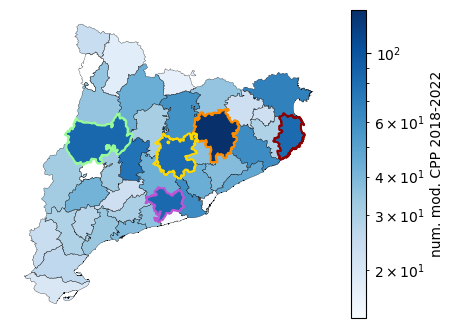

In [41]:
#highlight the counties with most mod CPP legal status actions
colors2 = {"Osona":'darkorange',
          "Noguera":'palegreen',
          "Alt Penedès":'mediumorchid',
          "Bages":'gold',
          "Baix Empordà":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
norm = LogNorm()
# plt.rc('text', usetex = True)
# plt.rc('font', family='serif')
plot = pam_pp_tot_gpd.plot(column = 'Estat',
                                  ax=ax,
                                  legend=False,
                                  cmap='Blues',
                                  norm = norm,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.2})
pam_pp_tot_gpd.boundary.plot(ax = ax, linewidth = 0.2, color = 'black')
pam_pp_tot_gpd = pam_pp_tot_gpd.set_index("NOM_COMARCA")
pam_pp_tot_gpd.loc[list(colors2.keys()),:].boundary.plot(ax=ax,color=list(colors2.values()), linewidth = 1.5)
pam_pp_tot_gpd = pam_pp_tot_gpd.reset_index()
cbar = fig.colorbar(plot.get_children()[0], ax = ax, label = r'num. mod. CPP 2018-2022')
cb_ax = fig.axes[1] 
# cb_ax.tick_params(labelsize=10)
plt.savefig('figures/total_CPP_num_2018_2022.pdf')
plt.show()

### 4. Map panel

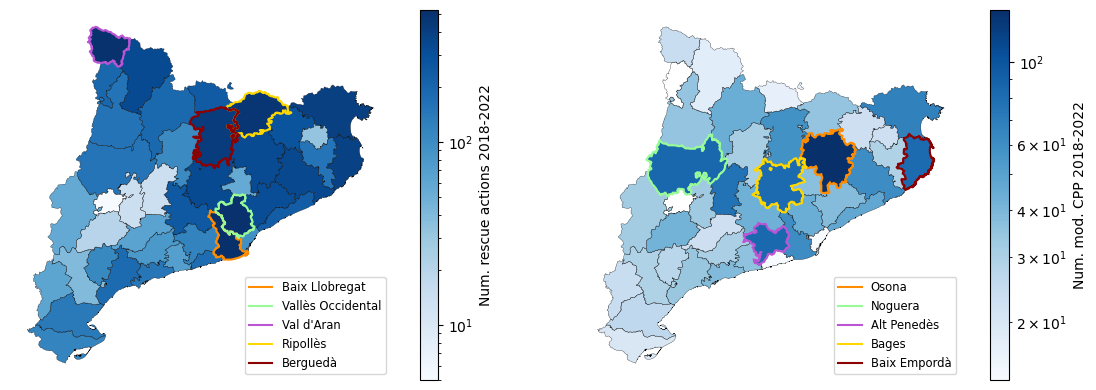

In [42]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first set of data (rescue actions)
ax1 = axes[0]
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.spines['left'].set_color('none')
norm1 = LogNorm()

plot1 = merged_rescue_tot_gpd.plot(column='ACT_NUM_ACTUACIO',
                                    ax=ax1,
                                    legend=False,
                                    cmap='Blues',
                                    norm=norm1,
                                    legend_kwds={'orientation': "horizontal", 'pad': 0.2})
merged_rescue_tot_gpd.boundary.plot(ax=ax1, linewidth=0.2, color='black')
merged_rescue_tot_gpd = merged_rescue_tot_gpd.set_index("NOM_COMARCA")
merged_rescue_tot_gpd.loc[list(colors.keys()), :].boundary.plot(ax=ax1, color=list(colors.values()), linewidth=1.5)
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cbar1 = fig.colorbar(plot1.get_children()[0], ax=ax1, label=r'Num. rescue actions 2018-2022')
cb_ax1 = fig.axes[1]

# Add legend for highlighted counties in the first map
for county, color in colors.items():
    ax1.plot([], [], color=color, label=county, linewidth=1.5)

# Plot the second set of data (CPP modifications)
ax2 = axes[1]
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_color('none')
norm2 = LogNorm()

plot2 = pam_pp_tot_gpd.plot(column='Estat',
                             ax=ax2,
                             legend=False,
                             cmap='Blues',
                             norm=norm2,
                             legend_kwds={'orientation': "horizontal", 'pad': 0.2})
pam_pp_tot_gpd.boundary.plot(ax=ax2, linewidth=0.2, color='black')
pam_pp_tot_gpd = pam_pp_tot_gpd.set_index("NOM_COMARCA")
pam_pp_tot_gpd.loc[list(colors2.keys()), :].boundary.plot(ax=ax2, color=list(colors2.values()), linewidth=1.5)
pam_pp_tot_gpd = pam_pp_tot_gpd.reset_index()
cbar2 = fig.colorbar(plot2.get_children()[0], ax=ax2, label=r'Num. mod. CPP 2018-2022')
cb_ax2 = fig.axes[1]

# Add legend for highlighted counties in the second map
for county, color in colors2.items():
    ax2.plot([], [], color=color, label=county, linewidth=1.5)
    
# Add individual legends for each map with reduced size and at lower left
ax1.legend(loc='lower right', fontsize='small')
ax2.legend(loc='lower right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save or show the figure
plt.savefig('figures/merged_maps_plot.pdf')
plt.show()

### 5. Rescue/ CPP study of Osona

#### 5.A Rescue actions study of Osona

In [43]:
columns = filt_rescues.columns.to_list()
#remove the coloms we need to keep
columns.remove('GEOREFERÈNCIA')
columns.remove('LATITUD')
columns.remove('LONGITUD')
columns.remove('ANY')
columns.remove('MUNICIPI')
columns.remove('TAL_NOM_ALARMA')
columns.remove('TAL_COD_ALARMA2')

In [44]:
resc_filt_os = filt_rescues[filt_rescues["NOM_COMARCA"] == "Osona"].drop(columns = columns).copy(deep = True)

In [45]:
resc_filt_os.head()

,TAL_COD_ALARMA2,TAL_NOM_ALARMA,MUNICIPI,ANY,LONGITUD,LATITUD,GEOREFERÈNCIA
1819,MU,Salvament i/o rescat de muntanya,Muntanyola,2022,2.127187,41.929779,POINT (2.127187229202 41.929778661215)
1837,MU,Salvament i/o rescat de muntanya,Vilanova de Sau,2022,2.429212,41.920734,POINT (2.429212124473 41.920734154401)
1883,RC,Recerca persones perdudes o desaparegudes,Tavertet,2022,2.403446,41.992594,POINT (2.403446087266 41.992593601088)
1892,MU,Salvament i/o rescat de muntanya,Santa Maria de Besora,2022,2.245424,42.123915,POINT (2.245423824424 42.123915004894)
1911,MU,Salvament i/o rescat de muntanya,Rupit i Pruit,2022,2.474646,41.995103,POINT (2.474645629342 41.995103116441)


What are the types of rescue actions carried out?

In [46]:
resc_filt_os["TAL_COD_ALARMA2"].unique()

array(['MU', 'RC', 'FL'], dtype=object)

In [47]:
resc_filt_os["TAL_COD_ALARMA2"].unique()[0]

'MU'

In [48]:
resc_filt_os[resc_filt_os["TAL_COD_ALARMA2"] == resc_filt_os["TAL_COD_ALARMA2"].unique()[0]].iloc[0]["TAL_NOM_ALARMA"]

'Salvament i/o rescat de muntanya'

In [49]:
codis_tipus = {}
for i in resc_filt_os["TAL_COD_ALARMA2"].unique():
    codis_tipus[i] = resc_filt_os[resc_filt_os["TAL_COD_ALARMA2"] == i].iloc[0]["TAL_NOM_ALARMA"]
print(codis_tipus)    

{'MU': 'Salvament i/o rescat de muntanya', 'RC': 'Recerca persones perdudes o desaparegudes', 'FL': 'Salvament i/o recerca i/o rescat en medi fluvial (rius,barrancs, llacs)'}


Salvament i/o recerca i/o rescat en medi fluvial (rius,barrancs, llacs) is too long for a description, let us omit (rius, barrancs, llacs)

In [50]:
codis_tipus["FL"] = codis_tipus["FL"].replace(" (rius,barrancs, llacs)", "")
print(codis_tipus["FL"])

Salvament i/o recerca i/o rescat en medi fluvial


Make new DataFrame with information separated by year and type of rescue action

In [51]:
grouped_by_years_os = resc_filt_os.groupby(by = ["ANY", "TAL_COD_ALARMA2"]).count().drop(columns = ["LONGITUD", "LATITUD", "GEOREFERÈNCIA"])
grouped_by_years_os.drop(columns = ['TAL_NOM_ALARMA'], inplace = True)
grouped_by_years_os.rename(columns = {'MUNICIPI':'NUM_ACTIONS'}, inplace = True)
grouped_by_years_os.head()

NUM_ACTIONS
ANY  TAL_COD_ALARMA2             
2018 FL                         4
     MU                        30
     RC                        23
2019 MU                        29
     RC                        11

In [52]:
# Map 'TAL_COD_ALARMA2' values to descriptions using codis_tipus dictionary
grouped_by_years_os.reset_index(level = 'TAL_COD_ALARMA2', inplace = True)
grouped_by_years_os['TAL_COD_ALARMA2_DESC'] = grouped_by_years_os['TAL_COD_ALARMA2'].map(codis_tipus)
grouped_by_years_os.head()

,TAL_COD_ALARMA2,NUM_ACTIONS,TAL_COD_ALARMA2_DESC
ANY,,,
2018,FL,4,Salvament i/o recerca i/o rescat en medi fluvial
2018,MU,30,Salvament i/o rescat de muntanya
2018,RC,23,Recerca persones perdudes o desaparegudes
2019,MU,29,Salvament i/o rescat de muntanya
2019,RC,11,Recerca persones perdudes o desaparegudes


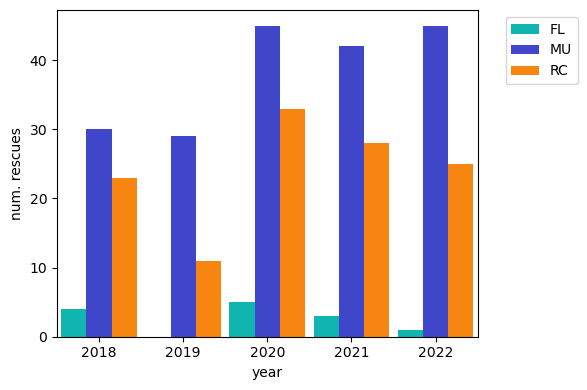

In [53]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
plt.figure(figsize=(6, 4))
colors = ["#0fb5ae", "#4046ca", "#f68511", "#de3d82", "#7e84fa"]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.barplot(x='ANY', y='NUM_ACTIONS', hue='TAL_COD_ALARMA2', data=grouped_by_years_os, palette = customPalette, saturation = 1, width = 0.9)

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. rescues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/rescue_osona.pdf")
plt.show()

#### 5.B CPP action in Osona

The CPP have already been filtered in the time window we are interested in. We only need to grab those entries with county Osona and drop innecessary columns

We are going to study the protection plans with modifications/updates/revisions in the year 2021, since we noticed a big peak of rescue actions

In [54]:
pam_prot_plans_os = pam_prot_plans[pam_prot_plans["NOM_COMARCA"] == "Osona"].copy().reset_index(drop = True)

In [55]:
pam_prot_plans_os

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província
0,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Santa Maria de Besora,Osona,Barcelona
1,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Folgueroles,Osona,Barcelona
2,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Vilanova de Sau,Osona,Barcelona
3,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Brull,Osona,Barcelona
4,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Santa Eugènia de Berga,Osona,Barcelona
...,...,...,...,...,...,...,...,...
133,E,PAM INUNCAT,Homologat,Homologació,2022-12-15,Seva,Osona,Barcelona
134,E,PAM INFOCAT,Homologat,Homologació,2022-12-15,Seva,Osona,Barcelona
135,E,PAM SISMICAT,Homologat,Homologació,2022-12-15,Seva,Osona,Barcelona
136,E,PAM VENTCAT,Homologat,Homologació,2022-12-15,Seva,Osona,Barcelona


In [56]:
pam_prot_plans_os["Nom del pla"].unique()

array(['PAM SISMICAT', 'PAM NEUCAT', 'PAM INFOCAT', 'PAM VENTCAT',
       'PAM INUNCAT'], dtype=object)

We need to create a year column

In [57]:
pam_prot_plans_os["ANY"] = pam_prot_plans_os["Data de l'últim esdeveniment"].dt.year

In [58]:
pam_prot_plans_os.head()

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província,ANY
0,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Santa Maria de Besora,Osona,Barcelona,2018
1,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Folgueroles,Osona,Barcelona,2018
2,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Vilanova de Sau,Osona,Barcelona,2018
3,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Brull,Osona,Barcelona,2018
4,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Santa Eugènia de Berga,Osona,Barcelona,2018


In [59]:
grouped_by_years_ccp_os = pam_prot_plans_os.groupby(by = ["ANY", "Nom del pla"]).count().drop(columns = ["Tipus pla", "Últim esdeveniment", "Data de l'últim esdeveniment", "Municipi", "NOM_COMARCA", "Província"])

In [60]:
grouped_by_years_ccp_os

Estat
ANY  Nom del pla        
2018 PAM INFOCAT       8
     PAM INUNCAT       8
     PAM NEUCAT       12
     PAM SISMICAT     12
     PAM VENTCAT       4
2019 PAM INFOCAT       7
     PAM INUNCAT       3
     PAM NEUCAT        8
     PAM SISMICAT      8
     PAM VENTCAT       2
2020 PAM INFOCAT       9
     PAM INUNCAT       6
     PAM NEUCAT       11
     PAM SISMICAT     11
     PAM VENTCAT       5
2021 PAM INFOCAT       3
     PAM INUNCAT       1
     PAM NEUCAT        4
     PAM SISMICAT      4
     PAM VENTCAT       3
2022 PAM INFOCAT       2
     PAM INUNCAT       1
     PAM NEUCAT        2
     PAM SISMICAT      2
     PAM VENTCAT       2

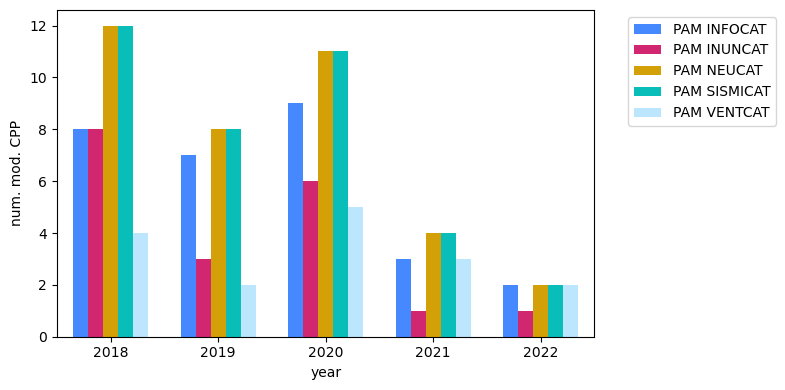

In [61]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
plt.figure(figsize=(8, 4))
hue_order = ["PAM INFOCAT", "PAM INUNCAT", "PAM NEUCAT", "PAM SISMICAT", "PAM VENTCAT"]
alternative_palette = ["#4689ff", "#d02770", "#d3a107", "#09bdb9", "#bbe6fe"]
customPalette = sns.set_palette(sns.color_palette(alternative_palette))
sns.barplot(x='ANY', y='Estat', hue='Nom del pla', data=grouped_by_years_ccp_os, hue_order = hue_order,palette = customPalette, saturation = 1, width = 0.7)

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. mod. CPP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/cpp_osona.pdf")
plt.show()

#### 5.C Osona rescue/CPP action panel

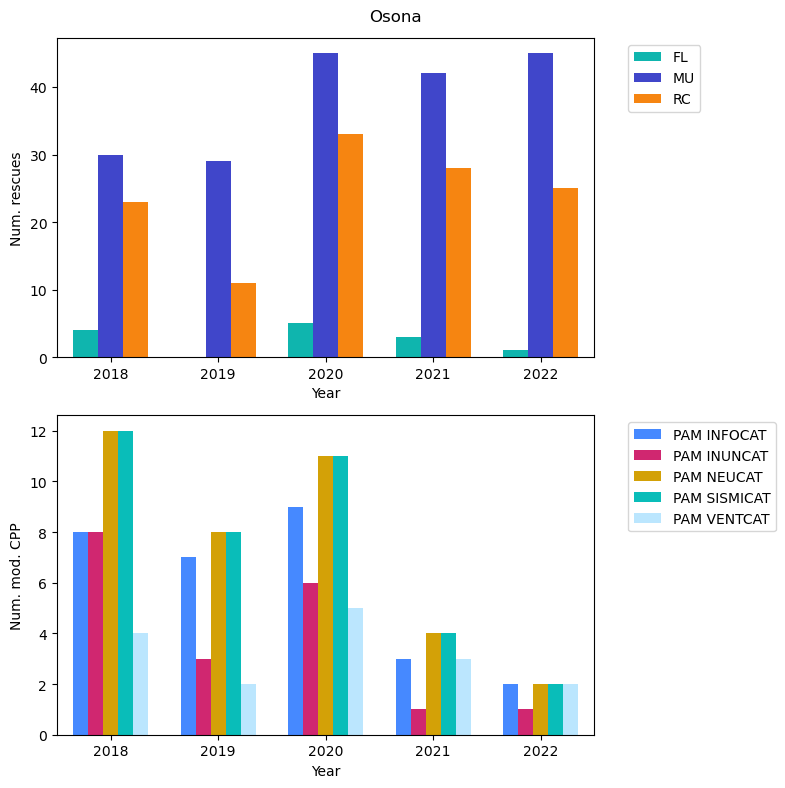

In [62]:
# Set the colorblind palette
colorblind_palette = ["#0fb5ae", "#4046ca", "#f68511"]

# Set the alternative palette
alternative_palette = ["#4689ff", "#d02770", "#d3a107", "#09bdb9", "#bbe6fe"]

#Order palette
hue_order = ["FL", "MU", "RC"]
hue_order_2 = ["PAM INFOCAT", "PAM INUNCAT", "PAM NEUCAT", "PAM SISMICAT", "PAM VENTCAT"]
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# First subplot (top)
sns.barplot(x='ANY', y='NUM_ACTIONS', hue='TAL_COD_ALARMA2', data=grouped_by_years_os, hue_order = hue_order, palette=colorblind_palette, saturation=1, width=0.7, ax=axes[0])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Num. rescues')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Second subplot (bottom)
sns.barplot(x='ANY', y='Estat', hue='Nom del pla', data=grouped_by_years_ccp_os, hue_order = hue_order_2,palette=alternative_palette, saturation=1, width=0.7, ax=axes[1])

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Num. mod. CPP')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the entire figure
plt.suptitle('Osona', fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("figures/combined_plot_osona.pdf")
plt.show()

### 6. Rescue/ CPP study of Baix Llobregat

#### 6.A Rescue actions study of Baix Llobregat
We will proceed similarly as we have done in the case of Osona

In [63]:
resc_filt_bl = filt_rescues[filt_rescues["NOM_COMARCA"] == "Baix Llobregat"].drop(columns = columns).copy(deep = True)

In [64]:
resc_filt_bl

,TAL_COD_ALARMA2,TAL_NOM_ALARMA,MUNICIPI,ANY,LONGITUD,LATITUD,GEOREFERÈNCIA
1803,RC,Recerca persones perdudes o desaparegudes,Cervelló,2022,1.968336,41.389724,POINT (1.968336482849 41.389723633915)
1838,MU,Salvament i/o rescat de muntanya,Collbató,2022,1.817894,41.585364,POINT (1.817894209259 41.585363674964)
1846,MU,Salvament i/o rescat de muntanya,"Papiol, El",2022,NaN,NaN,NaN
1850,MU,Salvament i/o rescat de muntanya,Molins de Rei,2022,2.060471,41.437883,POINT (2.060471253494 41.437882960729)
1871,MU,Salvament i/o rescat de muntanya,Cervelló,2022,1.929912,41.407613,POINT (1.929911825334 41.407612697399)
...,...,...,...,...,...,...,...
10174,MU,Rescat de muntanya,Molins de Rei,2018,2.077893,41.412137,NaN
10190,RC,Recerca persones perdudes,Collbató,2018,1.828212,41.569401,NaN
10214,FL,"Recerca i/o rescat en medi fluvial (rius, barr...",Cornellà de Llobregat,2018,2.059436,41.348674,NaN
10222,RC,Recerca persones perdudes,Collbató,2018,1.841238,41.574721,NaN


New dataframe grouped by year and alarm code

In [65]:
grouped_by_years_bl = resc_filt_bl.groupby(by = ["ANY", "TAL_COD_ALARMA2"]).count().drop(columns = ["LONGITUD", "LATITUD", "GEOREFERÈNCIA"])
grouped_by_years_bl.drop(columns = ['TAL_NOM_ALARMA'], inplace = True)
grouped_by_years_bl.rename(columns = {'MUNICIPI':'NUM_ACTIONS'}, inplace = True)
grouped_by_years_bl

NUM_ACTIONS
ANY  TAL_COD_ALARMA2             
2018 FL                         4
     MR                         6
     MU                        48
     RC                        26
2019 CO                         1
     FL                         6
     MR                         3
     MU                        63
     RC                        26
2020 CO                         1
     FL                         2
     MR                         8
     MU                        64
     RC                        24
2021 FL                         3
     MR                         7
     MU                        99
     RC                        26
2022 CO                         1
     FL                         5
     MR                         8
     MU                        70
     RC                        26

We will also make a bar plot for the total number of rescue operations by year and hued by the typology for the Baix Llobregat

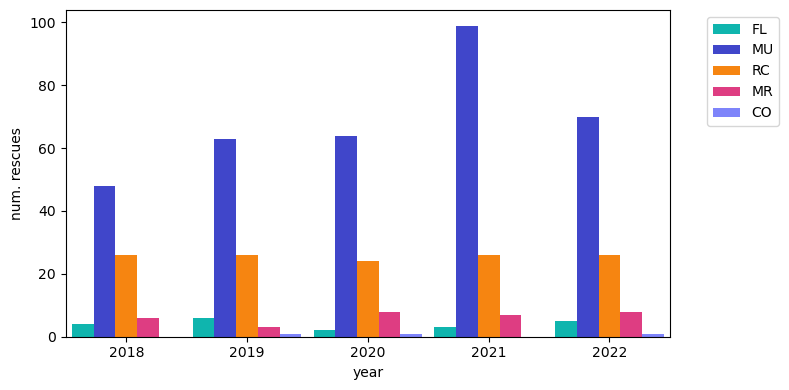

In [66]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
plt.figure(figsize=(8, 4))
hue_order = ["FL", "MU", "RC", "MR", "CO"]
colors = ["#0fb5ae", "#4046ca", "#f68511", "#de3d82", "#7e84fa"]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.barplot(x='ANY', y='NUM_ACTIONS', hue='TAL_COD_ALARMA2', hue_order = hue_order, data=grouped_by_years_bl, palette = customPalette, saturation = 1, width = 0.9)

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. rescues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/rescue_baix_llobregat.pdf")
plt.show()

#### 6.B CPP action in Baix Llobregat
We proceed similarly as we have done for the case of Osona

In [67]:
pam_prot_plans_bl = pam_prot_plans[pam_prot_plans["NOM_COMARCA"] == "Baix Llobregat"].copy().reset_index(drop = True)

In [68]:
pam_prot_plans_bl

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província
0,E,PAM VENTCAT,Homologat pendent de revisió,Homologació,2019-03-21,Sant Esteve Sesrovires,Baix Llobregat,Barcelona
1,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2019-03-21,Sant Esteve Sesrovires,Baix Llobregat,Barcelona
2,E,PAM INUNCAT,Homologat pendent de revisió,Homologació,2019-03-21,Sant Esteve Sesrovires,Baix Llobregat,Barcelona
3,E,PAM INFOCAT,Homologat pendent de revisió,Homologació,2019-03-21,Sant Esteve Sesrovires,Baix Llobregat,Barcelona
4,E,PAM INUNCAT,Homologat,Homologació,2020-10-30,Prat de Llobregat,Baix Llobregat,Barcelona
...,...,...,...,...,...,...,...,...
56,E,PAM VENTCAT,Homologat,Homologació,2022-10-06,Viladecans,Baix Llobregat,Barcelona
57,E,PAM SISMICAT,Homologat,Homologació,2022-12-15,Sant Joan Despí,Baix Llobregat,Barcelona
58,E,PAM VENTCAT,Homologat,Homologació,2022-12-15,Sant Joan Despí,Baix Llobregat,Barcelona
59,E,PAM NEUCAT,Homologat,Homologació,2022-12-15,Sant Joan Despí,Baix Llobregat,Barcelona


What CCP plans have been homologated/revised/updated?

In [69]:
pam_prot_plans_bl["Nom del pla"].unique()

array(['PAM VENTCAT', 'PAM NEUCAT', 'PAM INUNCAT', 'PAM INFOCAT',
       'PAM SISMICAT'], dtype=object)

Create year columns

In [70]:
pam_prot_plans_bl["ANY"] = pam_prot_plans_bl["Data de l'últim esdeveniment"].dt.year

In [71]:
grouped_by_years_ccp_bl = pam_prot_plans_bl.groupby(by = ["ANY", "Nom del pla"]).count().drop(columns = ["Tipus pla", "Últim esdeveniment", "Data de l'últim esdeveniment", "Municipi", "NOM_COMARCA", "Província"])
grouped_by_years_ccp_bl

Estat
ANY  Nom del pla        
2019 PAM INFOCAT       1
     PAM INUNCAT       1
     PAM NEUCAT        1
     PAM VENTCAT       1
2020 PAM INFOCAT       1
     PAM INUNCAT       1
     PAM NEUCAT        1
     PAM SISMICAT      1
     PAM VENTCAT       1
2021 PAM INFOCAT       7
     PAM INUNCAT       7
     PAM NEUCAT        7
     PAM SISMICAT      7
     PAM VENTCAT       5
2022 PAM INFOCAT       3
     PAM INUNCAT       4
     PAM NEUCAT        4
     PAM SISMICAT      4
     PAM VENTCAT       4

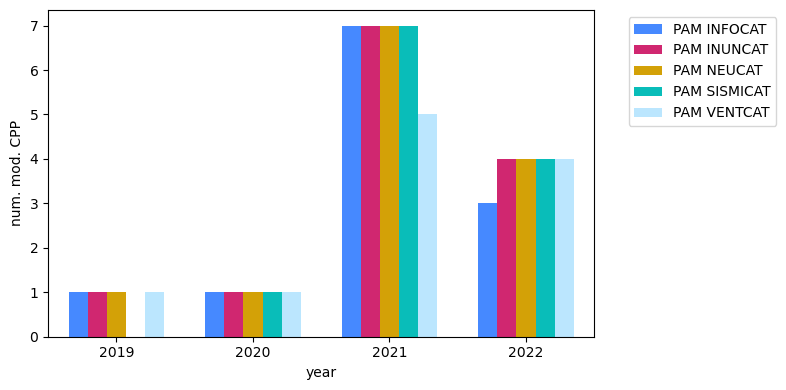

In [72]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
plt.figure(figsize=(8, 4))
hue_order = ["PAM INFOCAT", "PAM INUNCAT", "PAM NEUCAT", "PAM SISMICAT", "PAM VENTCAT"]
alternative_palette = ["#4689ff", "#d02770", "#d3a107", "#09bdb9", "#bbe6fe"]
customPalette = sns.set_palette(sns.color_palette(alternative_palette))
sns.barplot(x='ANY', y='Estat', hue='Nom del pla', data=grouped_by_years_ccp_bl, hue_order = hue_order ,palette = customPalette, saturation = 1, width = 0.7)

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. mod. CPP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/cpp_baix_llobregat.pdf")
plt.show()

#### 6.C Baix Llobregat rescue/CPP action panel

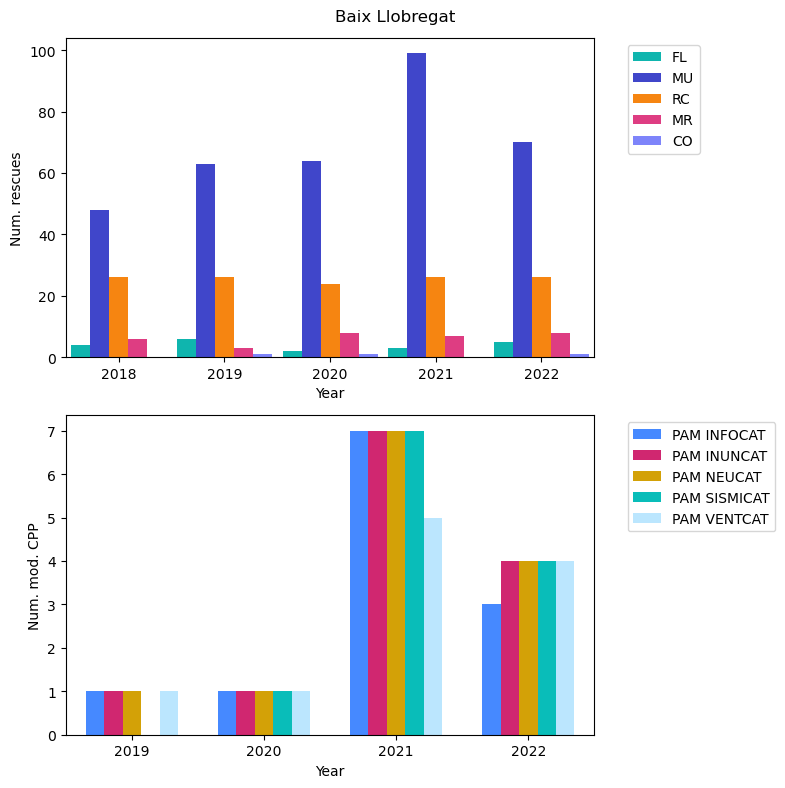

In [73]:
# Set the colorblind palette
colorblind_palette = ["#0fb5ae", "#4046ca", "#f68511", "#de3d82", "#7e84fa"]

# Set the alternative palette
alternative_palette = ["#4689ff", "#d02770", "#d3a107", "#09bdb9", "#bbe6fe"]

hue_order = ["FL", "MU", "RC", "MR", "CO"]
hue_order_2 = ["PAM INFOCAT", "PAM INUNCAT", "PAM NEUCAT", "PAM SISMICAT", "PAM VENTCAT"]
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# First subplot (top)
sns.barplot(x='ANY', y='NUM_ACTIONS', hue='TAL_COD_ALARMA2', hue_order=hue_order, data=grouped_by_years_bl, palette=colorblind_palette, saturation=1, width=0.9, ax=axes[0])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Num. rescues')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Second subplot (bottom)
sns.barplot(x='ANY', y='Estat', hue='Nom del pla', data=grouped_by_years_ccp_bl, hue_order = hue_order_2,palette=alternative_palette, saturation=1, width=0.7, ax=axes[1])

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Num. mod. CPP')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the entire figure
plt.suptitle('Baix Llobregat', fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("figures/combined_plot_baix_llobregat.pdf")
plt.show()


### 7. Rescue/ CPP study of Val d'Aran

#### 7.A Rescue actions study of Val d'Aran
We will proceed similarly as we have done in the preivous cases

In [74]:
resc_filt_va = filt_rescues[filt_rescues["NOM_COMARCA"] == "Val d'Aran"].drop(columns = columns).copy(deep = True)

In [75]:
resc_filt_va

,TAL_COD_ALARMA2,TAL_NOM_ALARMA,MUNICIPI,ANY,LONGITUD,LATITUD,GEOREFERÈNCIA
1797,MU,Salvament i/o rescat de muntanya,Naut Aran,2022,0.993092,42.670455,POINT (0.993092440136 42.670455109079)
1806,MU,Salvament i/o rescat de muntanya,Naut Aran,2022,0.963995,42.732617,POINT (0.963995209895 42.732616911909)
1808,MU,Salvament i/o rescat de muntanya,Vielha e Mijaran,2022,0.747175,42.631004,POINT (0.747175447428 42.631004146557)
1823,MU,Salvament i/o rescat de muntanya,Naut Aran,2022,0.946063,42.703381,POINT (0.946063112774 42.703381338418)
1824,MU,Salvament i/o rescat de muntanya,Naut Aran,2022,0.946260,42.699999,POINT (0.946260107866 42.699998958951)
...,...,...,...,...,...,...,...
10189,RC,Recerca persones perdudes,Vielha e Mijaran,2018,0.800557,42.721543,NaN
10200,MU,Rescat de muntanya,Vielha e Mijaran,2018,0.716576,42.638377,NaN
10207,MU,Rescat de muntanya,Naut Aran,2018,NaN,NaN,NaN
10215,MU,Rescat de muntanya,Naut Aran,2018,NaN,NaN,NaN


New dataframe grouped by year and alarm code

In [76]:
grouped_by_years_va = resc_filt_va.groupby(by = ["ANY", "TAL_COD_ALARMA2"]).count().drop(columns = ["LONGITUD", "LATITUD", "GEOREFERÈNCIA"])
grouped_by_years_va.drop(columns = ['TAL_NOM_ALARMA'], inplace = True)
grouped_by_years_va.rename(columns = {'MUNICIPI':'NUM_ACTIONS'}, inplace = True)
grouped_by_years_va

NUM_ACTIONS
ANY  TAL_COD_ALARMA2             
2018 CO                         1
     FL                         1
     MU                        72
     RC                        20
2019 FL                         1
     MU                        75
     RC                        16
2020 FL                         2
     MU                        68
     RC                        20
2021 FL                         2
     MU                        85
     RC                        15
2022 CO                         1
     MU                       106
     RC                        15

We will also make a bar plot for the total number of rescue operations by year and hued by the typology for Val d'Aran. We do this to see if there are different patterns than the ones we have already seen

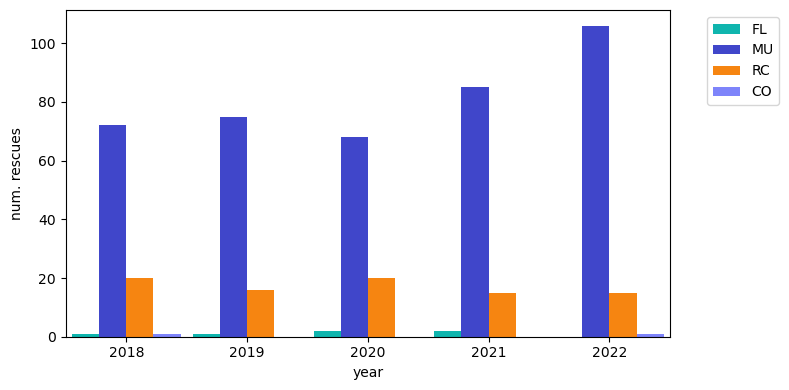

In [77]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
plt.figure(figsize=(8, 4))
hue_order = ["FL", "MU", "RC", "CO"]
colors = ["#0fb5ae", "#4046ca", "#f68511", "#7e84fa"]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.barplot(x='ANY', y='NUM_ACTIONS', hue='TAL_COD_ALARMA2', hue_order = hue_order, data=grouped_by_years_va, palette = customPalette, saturation = 1, width = 0.9)

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. rescues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/rescue_val_d_aran.pdf")
plt.show()

#### 7.B CPP action in Val d'Aran
We proceed similarly as we have done for the previous cases

In [78]:
pam_prot_plans_va = pam_prot_plans[pam_prot_plans["NOM_COMARCA"] == "Aran"].copy().reset_index(drop = True)

In [79]:
pam_prot_plans_va

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província
0,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Vilamòs,Aran,Lleida
1,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Vielha e Mijaran,Aran,Lleida
2,E,PAM VENTCAT,Homologat pendent de revisió,Homologació,2018-12-05,Arres,Aran,Lleida
3,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Arres,Aran,Lleida
4,E,PAM INFOCAT,Homologat pendent de revisió,Homologació,2018-12-05,Vielha e Mijaran,Aran,Lleida
5,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Vielha e Mijaran,Aran,Lleida
6,E,PAM ALLAUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Bòrdes,Aran,Lleida
7,E,PAM ALLAUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Arres,Aran,Lleida
8,E,PAM NEUCAT,Homologat pendent de revisió,Homologació,2018-12-05,Arres,Aran,Lleida
9,E,PAM SISMICAT,Homologat pendent de revisió,Homologació,2018-12-05,Vilamòs,Aran,Lleida


In [80]:
pam_prot_plans_va["Nom del pla"].unique()

array(['PAM NEUCAT', 'PAM SISMICAT', 'PAM VENTCAT', 'PAM INFOCAT',
       'PAM ALLAUCAT', 'PAM INUNCAT'], dtype=object)

In [81]:
pam_prot_plans_va["ANY"] = pam_prot_plans_va["Data de l'últim esdeveniment"].dt.year

In [82]:
grouped_by_years_ccp_va = pam_prot_plans_va.groupby(by = ["ANY", "Nom del pla"]).count().drop(columns = ["Tipus pla", "Últim esdeveniment", "Data de l'últim esdeveniment", "Municipi", "NOM_COMARCA", "Província"])
grouped_by_years_ccp_va

Estat
ANY  Nom del pla        
2018 PAM ALLAUCAT      3
     PAM INFOCAT       1
     PAM INUNCAT       4
     PAM NEUCAT        4
     PAM SISMICAT      4
     PAM VENTCAT       2
2022 PAM ALLAUCAT      1
     PAM INFOCAT       1
     PAM INUNCAT       1
     PAM NEUCAT        1
     PAM SISMICAT      1
     PAM VENTCAT       1

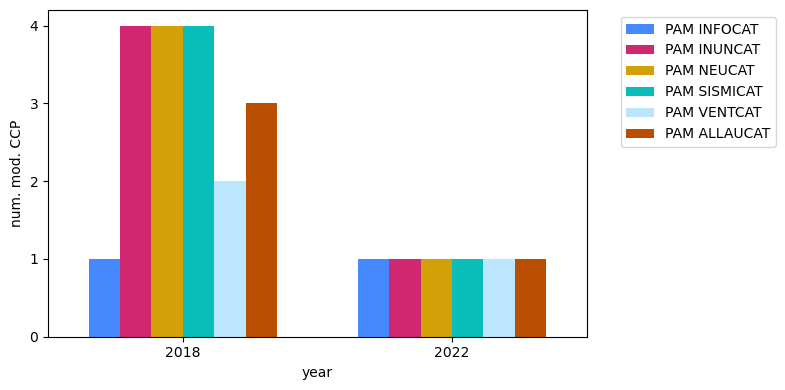

In [83]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
from  matplotlib.ticker import FuncFormatter #this is used to set yticks to integers
# Function to format y-axis ticks as integers

plt.figure(figsize=(8, 4))
hue_order = ["PAM INFOCAT", "PAM INUNCAT", "PAM NEUCAT", "PAM SISMICAT", "PAM VENTCAT", "PAM ALLAUCAT"]
alternative_palette = ["#4689ff", "#d02770", "#d3a107", "#09bdb9", "#bbe6fe", "#ba4e00"]
customPalette = sns.set_palette(sns.color_palette(alternative_palette))
sns.barplot(x='ANY', y='Estat', hue='Nom del pla', data=grouped_by_years_ccp_va, hue_order = hue_order ,palette = customPalette, saturation = 1, width = 0.7)

# Set y-axis ticks explicitly to avoid duplication and in integer format
plt.yticks(range(0, int(max(plt.yticks()[0])) + 1))

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. mod. CCP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/cpp_vall_d_aran.pdf")
plt.show()